# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report

In [2]:
!pip install -q imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [3]:
!pip install -q xgboost
import xgboost as xgb

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
df = pd.read_csv('fraud_detection.csv')
df.head()

,transaction_id,amount,merchant_type,device_type,label
0,1,46.93,travel,tablet,0
1,2,301.01,groceries,desktop,0
2,3,131.67,others,tablet,0
3,4,91.29,electronics,desktop,0
4,5,16.96,others,mobile,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  1000 non-null   int64  
 1   amount          1000 non-null   float64
 2   merchant_type   1000 non-null   object 
 3   device_type     1000 non-null   object 
 4   label           1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [6]:
df.describe(include = "all")

,transaction_id,amount,merchant_type,device_type,label
count,1000.000000,1000.000000,1000,1000,1000.000000
unique,NaN,NaN,5,3,NaN
top,NaN,NaN,others,mobile,NaN
freq,NaN,NaN,214,346,NaN
mean,500.500000,97.250560,NaN,NaN,0.050000
std,288.819436,97.250965,NaN,NaN,0.218054
min,1.000000,0.460000,NaN,NaN,0.000000
25%,250.750000,26.915000,NaN,NaN,0.000000
50%,500.500000,68.680000,NaN,NaN,0.000000
75%,750.250000,136.385000,NaN,NaN,0.000000


In [7]:
df.isnull().sum()

,0
transaction_id,0
amount,0
merchant_type,0
device_type,0
label,0


In [8]:
df.duplicated().sum()

np.int64(0)

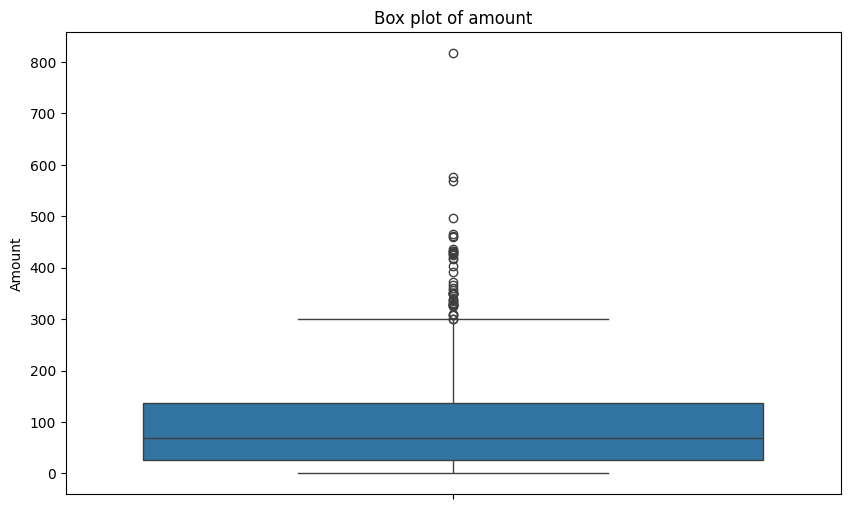

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='amount', data=df)
plt.title('Box plot of amount')
plt.ylabel('Amount')
plt.show()

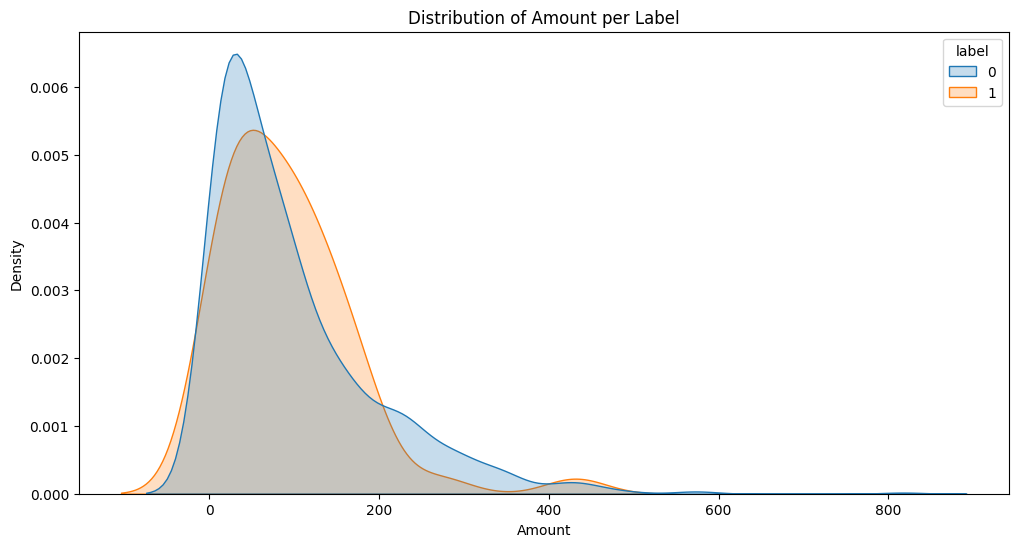

In [10]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='amount', hue='label', fill=True, common_norm=False)
plt.title('Distribution of Amount per Label')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

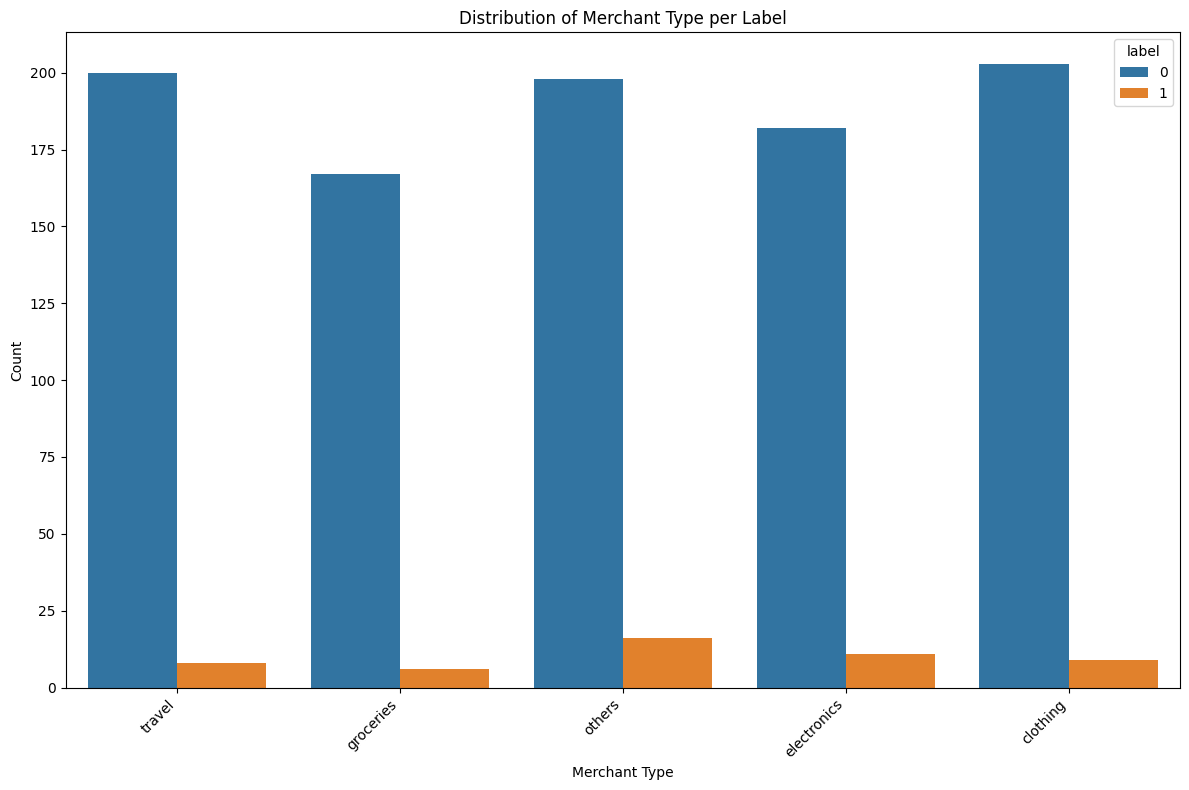

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(x='merchant_type', hue='label', data=df)
plt.title('Distribution of Merchant Type per Label')
plt.xlabel('Merchant Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

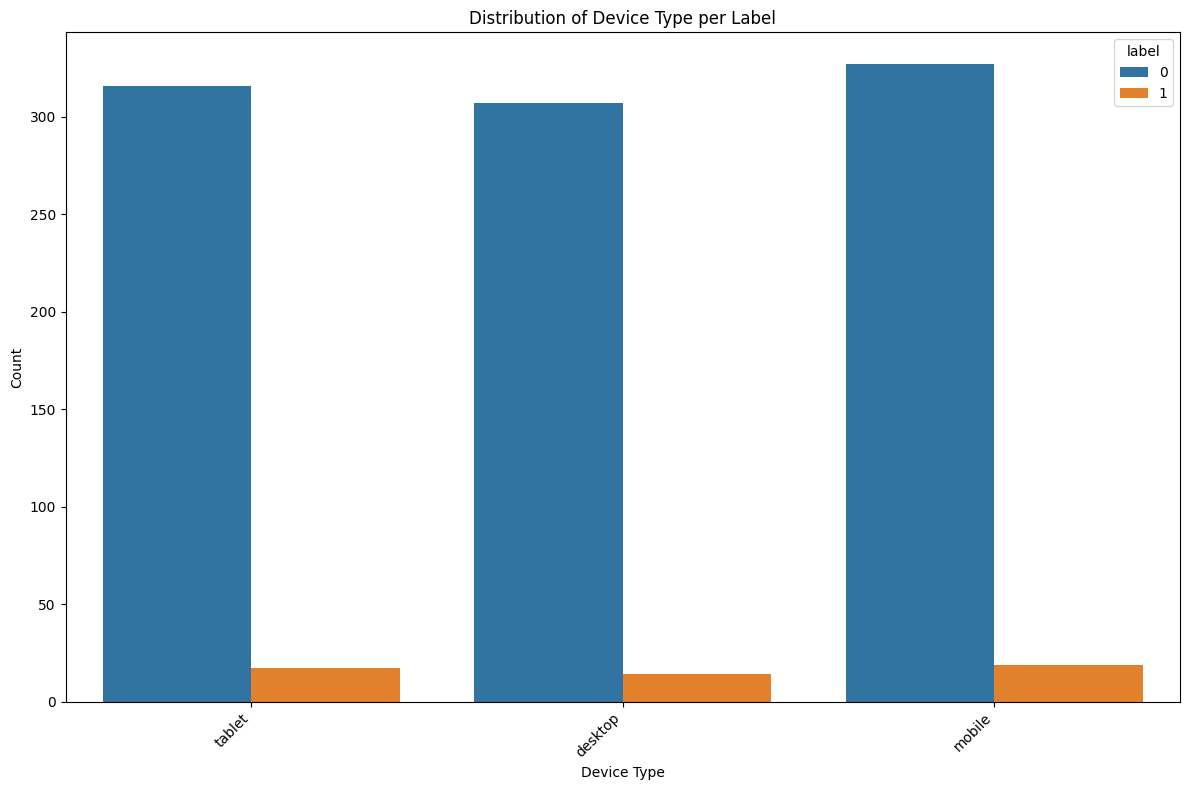

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(x='device_type', hue='label', data=df)
plt.title('Distribution of Device Type per Label')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
df['label'].value_counts()

,count
label,
0,950
1,50


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [14]:
df.drop(columns=["transaction_id"], inplace = True)

In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df = pd.get_dummies(df, columns=['merchant_type', 'device_type'], drop_first=True)

In [17]:
X = df.drop('label', axis=1)
y = df['label']

# Split the data with an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (798, 7)
Shape of X_test: (200, 7)
Shape of y_train: (798,)
Shape of y_test: (200,)


In [18]:
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print("Shape of X_train after oversampling:", X_train_resampled.shape)
print("Shape of y_train after oversampling:", y_train_resampled.shape)
print("Value counts of y_train after oversampling:\n", y_train_resampled.value_counts())

Shape of X_train after oversampling: (1516, 7)
Shape of y_train after oversampling: (1516,)
Value counts of y_train after oversampling:
 label
0    758
1    758
Name: count, dtype: int64


In [19]:
numerical_cols = ['amount']
scaler = RobustScaler()

X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [22]:
preproc_data = pd.DataFrame(X_train_resampled, columns=X_train_resampled.columns.tolist())
preproc_data['label'] = y_train_resampled.reset_index(drop=True)
preproc_data.to_csv('proceed_data.csv', index=False)

print('Pre-processed data successfully saved')
preproc_data.info()

Pre-processed data successfully saved
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   amount                     1516 non-null   float64
 1   merchant_type_electronics  1516 non-null   bool   
 2   merchant_type_groceries    1516 non-null   bool   
 3   merchant_type_others       1516 non-null   bool   
 4   merchant_type_travel       1516 non-null   bool   
 5   device_type_mobile         1516 non-null   bool   
 6   device_type_tablet         1516 non-null   bool   
 7   label                      1516 non-null   int64  
dtypes: bool(6), float64(1), int64(1)
memory usage: 32.7 KB
